# The Battle of the Neighbourhoods Capstone Project

## Introduction / Business Problem

### Introduction

Retail has always been shaped by shrewd merchants with a proclivity for taking risks and choosing the right products at the right time. This has always been considered more of an art than a science. However, with the tools to leverage consumer data, “Winning decisions are increasingly driven by analytics more than instinct, experience, or merchant ‘art’. By leveraging smarter tools—those beyond backward-looking, “hind sighting” analysis—retailers can increasingly make forward-looking predictions that are quickly becoming the “table stakes” necessary to keep up”, says [Mckinsey](https://www.mckinsey.com/industries/retail/our-insights/how-analytics-and-digital-will-drive-next-generation-retail-merchandising).


In a rapidly evolving world where busy bustling cities are booming with opportunity, when opening a new business, it is of paramount importance to do your homework in order to decide if the location for consideration is going to prove a profitable exercise.  As a data scientist, it is my job to assist my clients in their decision-making process. 

### Business Problem

Lucy Finnigan has approached me with an idea to open a coffee shop / book store and has provided me with two possible locations of interest. 

Although coffee has proven to be a favourite beverage of early morning go getters world-wide, there is massive competition where franchise brands are concerned. Lucy is not buying into a franchise, so location is of utmost importance to insure she becomes the forefront of her game in her new business venture to avoid her business plan folding before she’s even established her brand. 

Lucy has her heart set on Edmonton, Canada. Lucy is also fluent in English and French. It is now my task to leverage data from various sources in order to expose a gap in the market. 

## Data Section

[Geonames](https://www.geonames.org/postal-codes/CA/AB/alberta.html) will be used to obtain necessary data for the neighbourhoods, postal codes and geographic coordinates in Alberta. This website also offers the option of downloading the data into text files which enables one to format and import a CSV with the necessary dataset.

[Foursquare](https://foursquare.com) will be used to leverage and explore venue data to target recommended locations for the prospective business venture. 

By merging the data from Geonames and Foursquare we will be able to conclude where starting a non-franchised coffee shop / book store would prove most profitable.


## Methodology Section

According to an article published in 2016 which highlights 10 of Edmonton's best neighbourhoods,  [Edmonton's Best Neighbourhoods](https://www.avenueedmonton.com/city-life/edmontons-best-neighbourhoods-2016/) , I have suggested that Lucy pick the following two neighbourhoods against which to run the analysis. 

1. Strathcona

"Its mix of shops, restaurants and nightlife, the year-round farmers’ market and the Edmonton International Fringe Festival make historic Old Strathcona – once a separate city, which merged with Edmonton in 1912 – a destination neighbourhood. For many, Strathcona is the spiritual home of the Alberta New Democrats. Indeed, both Premier Rachel Notley and Linda Duncan – Alberta’s only NDP MP – live within two blocks of each other in the eastern part of the neighbourhood. “From Rachel’s house, you can see Linda’s house,” says a well-placed NDP staffer, who also makes Strathcona home."

2. Bonnie Doon

"Bonnie Doon is home to the city’s French quarter, whose main route, 91st Street, is also known as Rue Marie-Anne Gaboury – named after a French-Canadian woman who accompanied her voyageur husband to Fort Edmonton in 1807. Her grandson is also a western Canadian household name: Louis Riel. The Facult St. Jean – the French arm of the University of Alberta – and French cultural centre La Cit Francophone, are located in the area." 

Using k means segmentation and clustering, along with analysis and visualisations of the frequency coffee shops appear in the selected neighbourhoods, we can provide recommendations to our client on the best neighbourhoods to consider this new business venture

### Libraries required for to handle the data

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # comment this line again once installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # comment this line again once installed
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Import the CSV file stored as an asset in our Watson Studio repository. This contains all the location information we need for Alberta. 

In [2]:
# The code was removed by Watson Studio for sharing.

File read.


In [3]:
#We only want to assess the county of Edmonton and those neighbourhoods pertaining to Strathcona and Oliver
alberta_data = df[(df['Neighbourhood'].str.contains('Edmonton'))].reset_index(drop=True)
alberta_data.head()

,Country Code,Postal Code,Neighbourhood,County,County Code,Latitude,Longitude
0,CA,T5A,Edmonton (West Clareview / East Londonderry),Alberta,AB,53.5931,-113.4077
1,CA,T5B,Edmonton (East North Central / West Beverly),Alberta,AB,53.7353,-113.3369
2,CA,T5C,Edmonton (Central Londonderry),Alberta,AB,53.5996,-113.4549
3,CA,T5E,Edmonton (West Londonderry / East Calder),Alberta,AB,53.7454,-113.4465
4,CA,T5G,Edmonton (North Central / Queen Mary Park / YXD),Alberta,AB,53.5705,-113.5051


#### Define Foursquare Credentials and Version

In [4]:
CLIENT_ID = 'HPJQSVZS0GQYV4XVBA1DJ4ZPD4QGNTGCBTCBBG0OFYSW1URO' # your Foursquare ID
CLIENT_SECRET = 'U0XLAIZ2HK0FV02EZXSXZWNUT4ZE0NK3OOQAN0MNWBT5SPVQ' # your Foursquare Secret
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HPJQSVZS0GQYV4XVBA1DJ4ZPD4QGNTGCBTCBBG0OFYSW1URO
CLIENT_SECRET:U0XLAIZ2HK0FV02EZXSXZWNUT4ZE0NK3OOQAN0MNWBT5SPVQ


#### Create a map of Edmonton with the neighbourhoods superimposed on top.

In [5]:
#Get the Geo coorinantes of Alberta to begin the neighbourhood analysis
address = 'Edmonton, CA'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


In [44]:
# create map of Edmonton using latitude and longitude values
map_edmonton = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, county, neighborhood in zip(alberta_data['Latitude'], alberta_data['Longitude'], alberta_data['County'], alberta_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_edmonton)  
    
map_edmonton

## Explore Neighborhoods in Edmonton

In [45]:
#Using Foursquare to query popular venues around Edmonton
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
edmonton_venues = getNearbyVenues(names=alberta_data['Neighbourhood'],
                                   latitudes=alberta_data['Latitude'],
                                   longitudes=alberta_data['Longitude']
                                  )

Edmonton (West Clareview / East Londonderry)
Edmonton (East North Central / West Beverly)
Edmonton (Central Londonderry)
Edmonton (West Londonderry / East Calder)
Edmonton (North Central / Queen Mary Park / YXD)
Edmonton (North and East Downtown Fringe)
Edmonton (North Downtown)
Edmonton (South Downtown / South Downtown Fringe)
Edmonton (North Westmount / West Calder / East Mistatim)
Edmonton (South Westmount / Groat Estate / East Northwest Industrial)
Edmonton (Glenora / SW Downtown Fringe)
Edmonton (North Jasper Place)
Edmonton (Central Jasper Place / Buena Vista)
Edmonton (West Northwest Industrial / Winterburn)
Edmonton West (West Jasper Place / West Edmonton Mall)
Edmonton (Central Mistatim)
Edmonton (Central Beverly)
Edmonton (East Castledowns)
Edmonton (Landbank / Oliver / East Lake District)
Edmonton (West Lake District)
Edmonton (North Capilano)
Edmonton (SE Capilano / West Southeast Industrial / East Bonnie Doon)
Edmonton (Central Bonnie Doon)
Edmonton (South Bonnie Doon / Ea

In [9]:
print(edmonton_venues.shape)
edmonton_venues.head()

(258, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Edmonton (West Clareview / East Londonderry),53.5931,-113.4077,East Clareview Transit Centre,53.594927,-113.404422,Bus Station
1,Edmonton (Central Londonderry),53.5996,-113.4549,Premier Martial Arts,53.596514,-113.456790,Martial Arts Dojo
2,Edmonton (Central Londonderry),53.5996,-113.4549,Northgate Lions Seniors Recreation Centre,53.602166,-113.458401,Recreation Center
3,Edmonton (Central Londonderry),53.5996,-113.4549,24/7 Garbage Removal,53.595450,-113.453929,Home Service
4,Edmonton (North Central / Queen Mary Park / YXD),53.5705,-113.5051,Lan's Asian Grill,53.571128,-113.498572,Asian Restaurant


In [10]:
edmonton_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Edmonton (Central Beverly),1,1,1,1,1,1
Edmonton (Central Bonnie Doon),14,14,14,14,14,14
Edmonton (Central Jasper Place / Buena Vista),4,4,4,4,4,4
Edmonton (Central Londonderry),3,3,3,3,3,3
Edmonton (East Castledowns),2,2,2,2,2,2
Edmonton (East Mill Woods),1,1,1,1,1,1
Edmonton (East Southeast Industrial / South Clover Bar),1,1,1,1,1,1
Edmonton (Glenora / SW Downtown Fringe),4,4,4,4,4,4
Edmonton (Kaskitayo),9,9,9,9,9,9


In [11]:
print('There are {} uniques categories.'.format(len(edmonton_venues['Venue Category'].unique())))

There are 110 uniques categories.


## Analyze each Neighbourhood

In [33]:
# one hot encoding
edmonton_onehot = pd.get_dummies(edmonton_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
edmonton_onehot['Neighbourhood'] = edmonton_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [edmonton_onehot.columns[-1]] + list(edmonton_onehot.columns[:-1])
edmonton_onehot = edmonton_onehot[fixed_columns]

edmonton_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,College Gym,College Residence Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gastropub,Gay Bar,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hockey Arena,Home Service,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music Store,New American Restaurant,Nightclub,Noodle House,Office,Other Repair Shop,Park,Pharmacy,Photography Studio,Pizza Place,Plaza,Pool,Pool Hall,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoothie Shop,Soccer Field,Sports Club,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Shop
0,Edmonton (West Clareview / East Londonderry),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Edmonton (Central Londonderry),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Edmonton (Central Londonderry),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Edmonton (Central Londonderry),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Edmonton (North Central / Queen Mary Park / YXD),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
edmonton_grouped = edmonton_onehot.groupby('Neighbourhood').mean().reset_index()
edmonton_grouped 

,Neighbourhood,American Restaurant,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,College Gym,College Residence Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Department Store,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gastropub,Gay Bar,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hockey Arena,Home Service,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Museum,Music Store,New American Restaurant,Nightclub,Noodle House,Office,Other Repair Shop,Park,Pharmacy,Photography Studio,Pizza Place,Plaza,Pool,Pool Hall,Pub,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoothie Shop,Soccer Field,Sports Club,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Shop
0,Edmonton (Central Beverly),0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.0,0.0000,0.00,0.00,0.000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0000,0.00,0.00,0.0,1.000000,0.000000,0.0,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
1,Edmonton (Central Bonnie Doon),0.071429,0.000000,0.000,0.000000,0.000000,0.071429,0.0000,0.071429,0.0000,0.071429,0.000000,0.00,0.000000,0.0,0.0000,0.00,0.00,0.000,0.142857,0.071429,0.0,0.0,0.00,0.000000,0.000000,0.00,0.071429,0.00,0.000000,0.00,0.0,0.000000,0.071429,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.071429,0.071429,0.000000,0.0000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.0,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.071429,0.00,0.0000,0.00,0.00,0.0,0.071429,0.071429,0.0,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
2,Edmonton (Central Jasper Place / Buena Vista),0.000000,0.000000,0.000,0.000000,0.250000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.0,0.0000,0.00,0.00,0.000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.0,0.250000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.0000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.250000,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.000000,0.000,0.000000,0.250000,0.00,0.00,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.00

In [14]:
#Printing top 10 most common venues
num_top_venues = 10

for hood in edmonton_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = edmonton_grouped[edmonton_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Edmonton (Central Beverly)----
                     venue  freq
0                     Park   1.0
1      American Restaurant   0.0
2  New American Restaurant   0.0
3                Pool Hall   0.0
4                     Pool   0.0
5                    Plaza   0.0
6              Pizza Place   0.0
7       Photography Studio   0.0
8                 Pharmacy   0.0
9        Other Repair Shop   0.0


----Edmonton (Central Bonnie Doon)----
                  venue  freq
0        Clothing Store  0.14
1   American Restaurant  0.07
2           Music Store  0.07
3          Dance Studio  0.07
4             Gift Shop  0.07
5         Grocery Store  0.07
6              Pharmacy  0.07
7           Coffee Shop  0.07
8                  Park  0.07
9  Fast Food Restaurant  0.07


----Edmonton (Central Jasper Place / Buena Vista)----
                 venue  freq
0         Liquor Store  0.25
1               Bakery  0.25
2       Sandwich Place  0.25
3     Sushi Restaurant  0.25
4  American Restaurant  0.00
5

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
#Create a new dataframe of the top 5 venues
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = edmonton_grouped['Neighbourhood']

for ind in np.arange(edmonton_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(edmonton_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Edmonton (Central Beverly),Park,Wine Shop,Gay Bar,Eastern European Restaurant,Electronics Store
1,Edmonton (Central Bonnie Doon),Clothing Store,American Restaurant,Breakfast Spot,Fast Food Restaurant,Pharmacy
2,Edmonton (Central Jasper Place / Buena Vista),Bakery,Liquor Store,Sandwich Place,Sushi Restaurant,Wine Shop
3,Edmonton (Central Londonderry),Recreation Center,Home Service,Martial Arts Dojo,Wine Shop,Gay Bar
4,Edmonton (East Castledowns),Lingerie Store,Convenience Store,Wine Shop,Gay Bar,Eastern European Restaurant
5,Edmonton (East Mill Woods),BBQ Joint,Wine Shop,Gift Shop,Eastern European Restaurant,Electronics Store
6,Edmonton (East Southeast Industrial / South Cl...,Construction & Landscaping,Wine Shop,Department Store,Eastern European Restaurant,Electronics Store
7,Edmonton (Glenora / SW Downtown Fringe),Food & Drink Shop,Coffee Shop,Furniture / Home Store,Café,Wine Shop
8,Edmonton (Kaskitayo),Italian Restaurant,Bank,Pub,Coffee Shop,Shoe Store
9,Edmonton (Landbank / Oliver / East Lake District),Tourist Information Center,Food Truck,Wine Shop,Gay Bar,Discount Store


## Cluster Neighborhoods

In [17]:
# set number of clusters
kclusters = 5

edmonton_grouped_clustering = edmonton_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(edmonton_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 1, 1, 1, 3, 1, 1, 1, 1], dtype=int32)

In [18]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

edmonton_merged = alberta_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
edmonton_merged = edmonton_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

 # check the last columns!

In [19]:
edmonton_merged = edmonton_merged.dropna(how='any')  

edmonton_merged[['Cluster Labels']] = edmonton_merged[['Cluster Labels']].astype('int')

In [20]:
edmonton_merged.head()

,Country Code,Postal Code,Neighbourhood,County,County Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,CA,T5A,Edmonton (West Clareview / East Londonderry),Alberta,AB,53.5931,-113.4077,1,Bus Station,Wine Shop,Gift Shop,Eastern European Restaurant,Electronics Store
2,CA,T5C,Edmonton (Central Londonderry),Alberta,AB,53.5996,-113.4549,1,Recreation Center,Home Service,Martial Arts Dojo,Wine Shop,Gay Bar
4,CA,T5G,Edmonton (North Central / Queen Mary Park / YXD),Alberta,AB,53.5705,-113.5051,1,Discount Store,Asian Restaurant,BBQ Joint,Bus Station,Thrift / Vintage Store
5,CA,T5H,Edmonton (North and East Downtown Fringe),Alberta,AB,53.5514,-113.4916,1,Chinese Restaurant,Vietnamese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant
6,CA,T5J,Edmonton (North Downtown),Alberta,AB,53.5428,-113.4974,1,Coffee Shop,Sandwich Place,Italian Restaurant,Pub,Hotel


In [21]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(edmonton_merged['Latitude'], edmonton_merged['Longitude'], edmonton_merged['Neighbourhood'], edmonton_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters & Results

In [22]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 0, edmonton_merged.columns[[1] + list(range(0, edmonton_merged.shape[1]))]]

,Postal Code,Country Code,Postal Code,Neighbourhood,County,County Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
13,T5S,CA,T5S,Edmonton (West Northwest Industrial / Winterburn),Alberta,AB,53.5634,-113.6697,0,Other Repair Shop,Wine Shop,Gay Bar,Eastern European Restaurant,Electronics Store


In [23]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 1, edmonton_merged.columns[[1] + list(range(0, edmonton_merged.shape[1]))]]

,Postal Code,Country Code,Postal Code,Neighbourhood,County,County Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,T5A,CA,T5A,Edmonton (West Clareview / East Londonderry),Alberta,AB,53.5931,-113.4077,1,Bus Station,Wine Shop,Gift Shop,Eastern European Restaurant,Electronics Store
2,T5C,CA,T5C,Edmonton (Central Londonderry),Alberta,AB,53.5996,-113.4549,1,Recreation Center,Home Service,Martial Arts Dojo,Wine Shop,Gay Bar
4,T5G,CA,T5G,Edmonton (North Central / Queen Mary Park / YXD),Alberta,AB,53.5705,-113.5051,1,Discount Store,Asian Restaurant,BBQ Joint,Bus Station,Thrift / Vintage Store
5,T5H,CA,T5H,Edmonton (North and East Downtown Fringe),Alberta,AB,53.5514,-113.4916,1,Chinese Restaurant,Vietnamese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant
6,T5J,CA,T5J,Edmonton (North Downtown),Alberta,AB,53.5428,-113.4974,1,Coffee Shop,Sandwich Place,Italian Restaurant,Pub,Hotel
7,T5K,CA,T5K,Edmonton (South Downtown / South Downtown Fringe),Alberta,AB,53.5366,-113.5103,1,Park,Coffee Shop,Light Rail Station,Nightclub,Restaurant
9,T5M,CA,T5M,Edmonton (South Westmount / Groat Estate / Eas...,Alberta,AB,53.5630,-113.5662,1,Science Museum,Cosmetics Shop,Park,Sports Club,Coffee Shop
10,T5N,CA,T5N,Edmonton (Glenora / SW Downtown Fringe),Alberta,AB,53.5436,-113.5574,1,Food & Drink Shop,Coffee Shop,Furniture / Home Store,Café,Wine Shop
11,T5P,CA,T5P,Edmonton (North Jasper Place),Alberta,AB,53.5463,-113.5957,1,Pool,Pizza Place,Construction & Landscaping,Park,Discount Store
12,T5R,CA,T5R,Edmonton (Central Jasper Place / Buena Vista),Alberta,AB,53.5181,-113.5797,1,Bakery,Liquor Store,Sandwich Place,Sushi Restaurant,Wine Shop


In [24]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 2, edmonton_merged.columns[[1] + list(range(0, edmonton_merged.shape[1]))]]

,Postal Code,Country Code,Postal Code,Neighbourhood,County,County Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,T5L,CA,T5L,Edmonton (North Westmount / West Calder / East...,Alberta,AB,53.5850,-113.5526,2,Fast Food Restaurant,Wine Shop,Gift Shop,Eastern European Restaurant,Electronics Store
23,T6E,CA,T6E,Edmonton (South Bonnie Doon / East University),Alberta,AB,53.4914,-113.4802,2,Fast Food Restaurant,Vietnamese Restaurant,Korean Restaurant,Wine Shop,Gift Shop


In [25]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 3, edmonton_merged.columns[[1] + list(range(0, edmonton_merged.shape[1]))]]

,Postal Code,Country Code,Postal Code,Neighbourhood,County,County Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
28,T6L,CA,T6L,Edmonton (East Mill Woods),Alberta,AB,53.4593,-113.4145,3,BBQ Joint,Wine Shop,Gift Shop,Eastern European Restaurant,Electronics Store


In [26]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 4, edmonton_merged.columns[[1] + list(range(0, edmonton_merged.shape[1]))]]

,Postal Code,Country Code,Postal Code,Neighbourhood,County,County Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,T5W,CA,T5W,Edmonton (Central Beverly),Alberta,AB,53.5645,-113.4022,4,Park,Wine Shop,Gay Bar,Eastern European Restaurant,Electronics Store


In [27]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 5, edmonton_merged.columns[[1] + list(range(0, edmonton_merged.shape[1]))]]

,Postal Code,Country Code,Postal Code,Neighbourhood,County,County Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue


In [40]:
coffee_chart = edmonton_grouped.iloc[:, [0, 20]]
coffee_chart.set_index("Neighbourhood",drop=True,inplace=True)
coffee_chart.head()

,Coffee Shop
Neighbourhood,
Edmonton (Central Beverly),0.000000
Edmonton (Central Bonnie Doon),0.071429
Edmonton (Central Jasper Place / Buena Vista),0.000000
Edmonton (Central Londonderry),0.000000
Edmonton (East Castledowns),0.000000


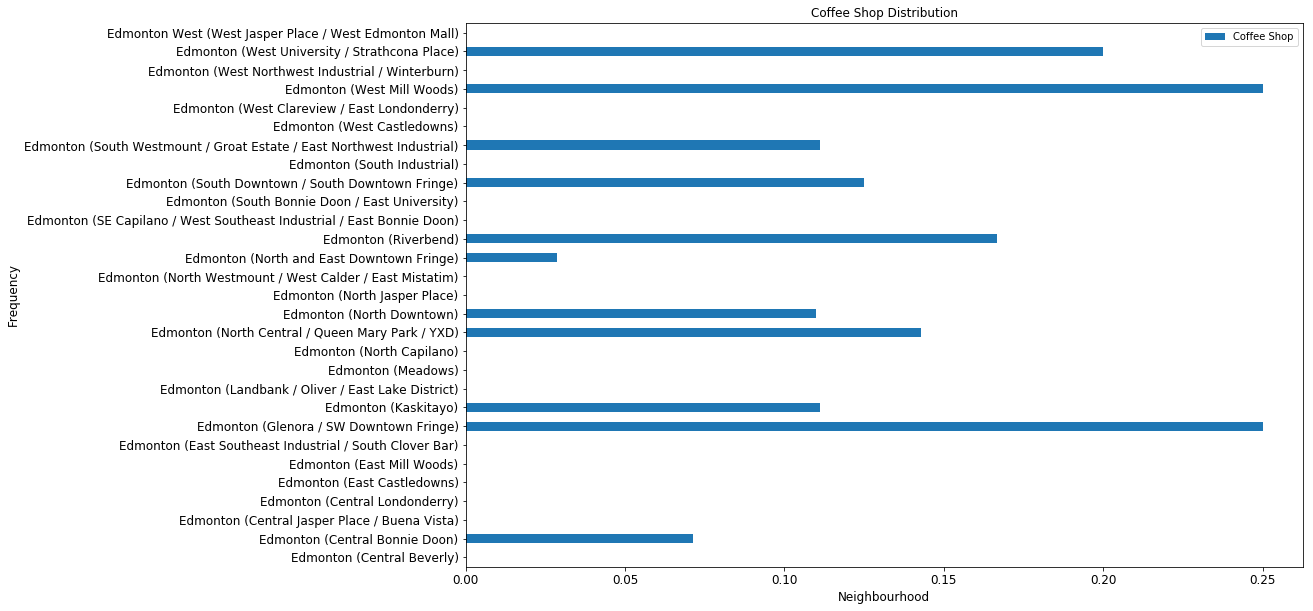

In [43]:
#Use a bar chart to analyze the frequency of the coffee shops already setup
import matplotlib.pyplot as plt
ax = coffee_chart[['Coffee Shop']].plot(kind='barh', title ="Coffee Shop Distribution", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Neighbourhood", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.show()

## Results

Based on my assessment of the various clusters using k means and mapping the frequency of the occurence of coffee shops throughout Edmonton: 
    
<b>Cluster 0</b>: Does not appear to have a Coffee Shop as its most popular venue. Upon further investigation, the bar char above indicates that there are no coffee shops in this area either. Strathcona and Bonnie Doon do not appear in this cluster though. 
               
<b>Cluster 1</b>: Strathcona , Central Bonnie Doon and East Bonnie Doon appear in this cluster. Stratchcona has an array of popular coffee shops. Central Bonnie Doon has coffee shops as well but none that appear in the top 5 search for popular venues. East Bonnie Doon does not contain any coffee shops at all. 
           
<b>Cluster 2</b>: No popular coffee shops appear in either neighbourhood. South Bonnie Doon in particular does not contain any coffee shops. 
           
<b>Cluster 3</b>: Does not contain any popular coffee shops. Does not contain Bonnie Doon or Stratchona as neighbourhoods.
        
<b>Cluster 4</b>: Does not contain any popular coffee shops. Does not contain Bonnie Doon or Stratchona as neighbourhoods.
        
<b>Cluster 5</b>: No information is provided for us in this cluster.

## Discussion

Following this analysis of Edmonton's most popular coffee shops , it's clear that there is room to open new Coffee Shops in the city of Edmonton, particularly East and South Bonnie Doon. Although Central Bonnie Doon has coffee shops in its neighbourhood, none appear very popular so there is a gap in the market for Lucy to open her 
business here. 

In my opinion, based on the plans to develop a new mall in [Central Bonnie Doon](https://www.edmonton.ca/residential_neighbourhoods/neighbourhoods/bonnie-doon-planning-applications.aspx), Lucy could inquire whether anyone has applied for a site to start a new coffee / shop bookstore. 

## Conclusion 

Although my client is quite insistent on opening her stores in Bonnie Doon and Stratchona, there is also definitely room outside of these two neighbourhoods to consider venture. One should not rule these other areas our for further investigation . 